In [1]:
# import
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
# iris data is already packed with sklearn
# now, loading the data
iris = load_iris()

type(iris)  # iris var is holding a sklearn dataset which is kind of dictionary

sklearn.datasets.base.Bunch

In [3]:
iris.keys() # it is holding, data, target, feature name etc

dict_keys(['DESCR', 'feature_names', 'data', 'target', 'target_names'])

In [4]:
# let's see them one by one

# desc
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
print(iris['feature_names'])
print(iris['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
# now, extracting the data into variables
X = iris['data']
y = iris['target']

print(len(X), len(y))

150 150


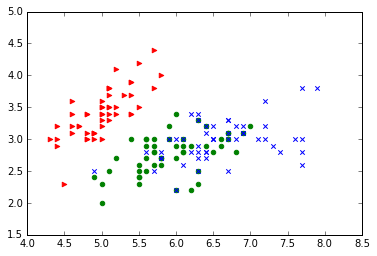

In [7]:
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'
    #plt.figure(figsize=(12,9))
    plt.scatter(X[y == t,0],X[y == t,1], marker=marker, color=c)

    Let's build a model which can identify the type of IRIS flower using simple mathematics

In [9]:
# creating boolean filtes
setosa = y==0
versi = y==1
virgi = y==2

#setosa

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
X_setosa, y_setosa = X[setosa,], y[setosa]
X_versi, y_versi = X[versi,], y[versi]
X_virgi, y_virgi = X[virgi,], y[virgi]

In [14]:
# creating petal length condition
print(X_setosa[:,2].max())
print(X_setosa[:,2].min())

1.9
1.0


In [16]:
# let's check the same for others but not setosa
print(X[~setosa,2].max())
print(X[~setosa,2].min())

6.9
3.0


In [17]:
# let's check the same for others individually
print(X_versi[:,2].max())
print(X_versi[:,2].min())

print(X_virgi[:,2].max())
print(X_virgi[:,2].min())

5.1
3.0
6.9
4.5


    But this way is easy with small datasets which has few features. We need to use advance classification technique to classify large and complex data

In [62]:
# import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn import metrics

** KNN Classifier with 1 neighbors **

In [35]:
# reading SEED dataset
header = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry coefficient", 
          "length of kernel groove", "variety"]
seed = sp.genfromtxt("data/seeds_dataset.txt", delimiter="|")
seed

array([[ 15.26  ,  14.84  ,   0.871 , ...,   2.221 ,   5.22  ,   1.    ],
       [ 14.88  ,  14.57  ,   0.8811, ...,   1.018 ,   4.956 ,   1.    ],
       [ 14.29  ,  14.09  ,   0.905 , ...,   2.699 ,   4.825 ,   1.    ],
       ..., 
       [ 13.2   ,  13.66  ,   0.8883, ...,   8.315 ,   5.056 ,   3.    ],
       [ 11.84  ,  13.21  ,   0.8521, ...,   3.598 ,   5.044 ,   3.    ],
       [ 12.3   ,  13.34  ,   0.8684, ...,   5.637 ,   5.063 ,   3.    ]])

In [50]:
sX = seed[:,0:7]
sy = seed[:,7]

print(sX[:2], sy[:2])

[[ 15.26    14.84     0.871    5.763    3.312    2.221    5.22  ]
 [ 14.88    14.57     0.8811   5.554    3.333    1.018    4.956 ]] [ 1.  1.]


In [51]:
# instantiate the Classifier with neighbors = 1
knn1 = KNeighborsClassifier(n_neighbors=1)

# fitting the data
knn1.fit(sX, sy)

# predicting the type
knn1.predict([[15.26,14.84,0.871,5.763,3.312,2.221,5.22]])

array([ 1.])

    As we have used all the data to train our model, so training accuracy will be > ~95, but this is not what we want, before procceding futher let's check the accuracy

In [60]:
sy_pred = knn1.predict(sX)
metrics.accuracy_score(sy, sy_pred)  # it will always be around 1

0.97142857142857142

** KNN with N=1, splitting the data into train and test **

In [56]:
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.4, random_state=4)

In [61]:
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(sX_train, sy_train)
sy_test_pred = knn1.predict(sX_test)

metrics.accuracy_score(sy_test, sy_test_pred)  # 92% accuracy

0.9285714285714286

** Simulating the same with KFold **

In [64]:
kf = KFold(len(sX), n_folds=5, shuffle=True, random_state=7)
kf

sklearn.cross_validation.KFold(n=210, n_folds=5, shuffle=True, random_state=7)

In [71]:
mean = []
for train, test in kf:
    knn1.fit(sX[train], sy[train])
    sy_pred = knn1.predict(sX[test])
    mean.append(metrics.accuracy_score(sy[test], sy_pred))
print(mean)
print(np.mean(mean))

[0.95238095238095233, 0.8571428571428571, 0.83333333333333337, 0.9285714285714286, 0.90476190476190477]
0.895238095238
